# ImageBatch tutorial

## Actions

In each section you will see examples of transformations that are performed by the choosen action. The section itself consists of several cells. Every cell has only one function invoking: ``plot_examples``. The first two arguments are not important, others are responsible for different parameters passed to an action. Action itself is perfomed with every item in the parameter's list. For example:

``
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])
``

in the [crop](#Crop) section will first invoke ``crop(origin='center', shape=(14,14)``, then  ``crop(origin='top_left', shape=(18,18)`` and etc. For every invocation two images are drawn in a line: before and after an action.

- [crop](#Crop)
- [flip](#Flip)
- [rotate](#Rotate)
- [shift](#Shift)
- [resize](#Resize)
- [scale](#Scale)
- [pad](#Pad)
- [transform](#Transform)
- [invert](#Invert)
- [threshold](#Threshold)
- [multiply](#Multiply)
- [multiplicative_noise](#Multiplicative_noise)
- [add](#Add)
- [additive_noise](#Additive_noise)
- [salt](#Salt)
- [filter](#Filter)
- [put_on_background](#Put_on_background)
- [pil_convert](#PIL_convert)
- [posterize](#Posterize)
- [cutout](#Cutout)
- [elastic_transform](#Elastic_transform)

Perhaps, any function from ``scipy.ndimage`` is accesible as an action. Just use it as a usual action (without specifying ``input`` parameter).


## Crop_to_patches

If you want to separate image into several smaller ones, use [crop_to_patches](#crop_to_patches).

## Using actions in pipelines

This section provides information about using actions in a pipeline. 


[Pipeline example](#Pipeline-example)





# Actions

In [1]:
%matplotlib inline

import sys
import os
import numpy as np
from matplotlib import pyplot as plt

import PIL

sys.path.append(os.path.abspath('../..'))

import dataset as ds
from dataset.opensets import CIFAR10, MNIST
from dataset import B, V, C, F, R, P
from dataset.models.tf import VGG7
from dataset import Pipeline
from dataset import ImagesBatch


def show_img(axis, image, title):
    axis.imshow(image)
    axis.set_title(title, fontsize=12)
    axis.tick_params(bottom='off', labelbottom='off', left='off', labelleft='off')

def plot_examples(title, action, title_action=True, **params):
    num_plots = 2 * len(list(params.values())[0])
    f, a = plt.subplots(1, num_plots, figsize=(16, 3))
    
    ppl = Pipeline().to_PIL()
    
    for i in range(num_plots // 2):
        batch = cifar_ds.train.next_batch(2)
        current_params = {k : v[i] for k, v in params.items()}
        batch.to_array()
        show_img(a[i*2], batch.images[0].squeeze(), 'original')
        batch.to_PIL()
        action(batch, **current_params)
        batch.to_array()
        if title_action:
            title_action = '\n'.join((str(k)+'=' + str(v if not callable(v) else 'sampler') for k, v in current_params.items()))        
        else:
            title_action = ''
        show_img(a[i*2+1], batch.images[0].squeeze(), title_action)
    plt.suptitle(title, fontsize=18)

PATH_TO_CIFAR = None   

cifar_ds = CIFAR10(batch_class=ImagesBatch, path=PATH_TO_CIFAR)

/home/grisha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting...
Extracted


# Crop

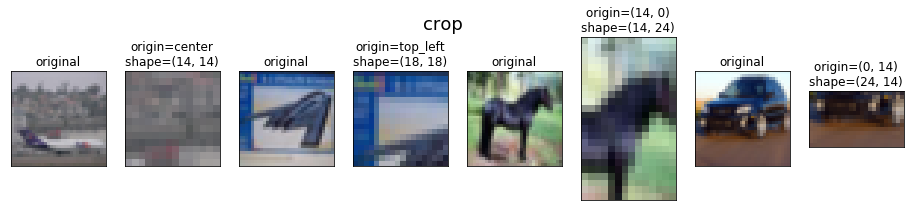

In [2]:
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])

##  Crop at random origin

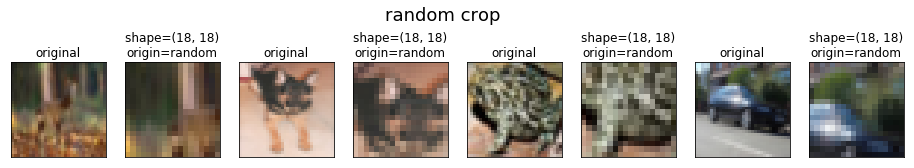

In [3]:
plot_examples(title = 'random crop',
              action = lambda batch, **params: batch.crop(**params),
              shape = [(18, 18)]*4,
              origin = ['random']*4)

# Flip

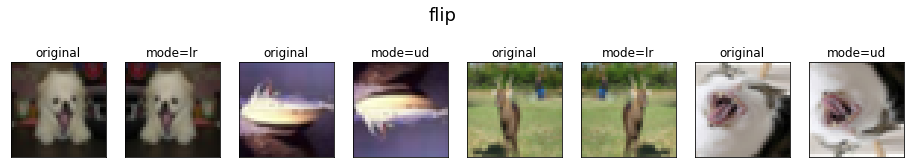

In [4]:
plot_examples(title = 'flip',
              action = lambda batch, **params: batch.flip(**params),
              mode = ['lr', 'ud', 'lr', 'ud'])

# Rotate

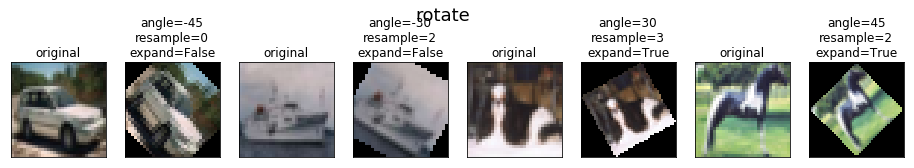

In [5]:
plot_examples(title = 'rotate',
              action = lambda batch, **params: batch.rotate(**params),
              angle = [-45, -30, 30, 45],
              resample = [PIL.Image.NEAREST, PIL.Image.BILINEAR, PIL.Image.BICUBIC, PIL.Image.BILINEAR],
              expand = [False, False, True, True])

# Shift

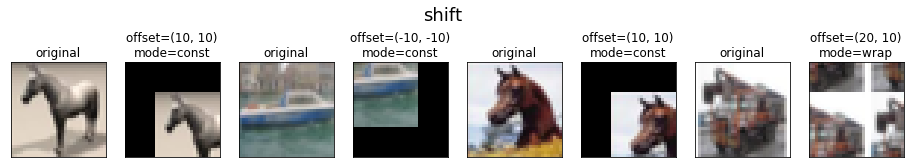

In [6]:
plot_examples(title = 'shift',
              action = lambda batch, **params: batch.shift(**params),
              offset = [(10, 10), (-10, -10), (10, 10), (20, 10)],
              mode = ['const', 'const', 'const', 'wrap'])

# Resize

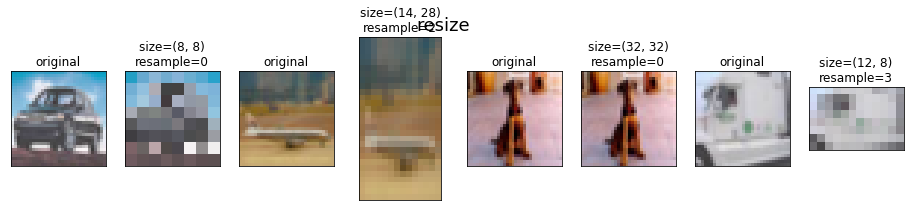

In [9]:
plot_examples(title = 'resize',
              action = lambda batch, **params: batch.resize(**params),
              size = [(8, 8), (14, 28), (32, 32), (12, 8)],
              resample = [0, 2, 0, 3])

# Scale

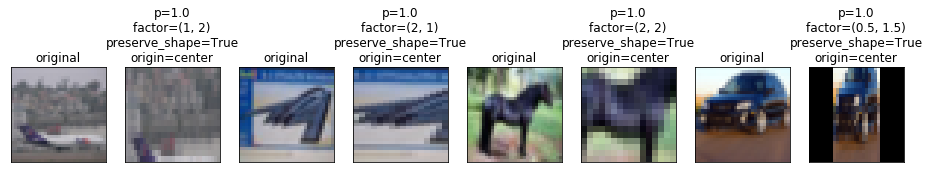

In [2]:
factor_sampler = lambda: (1, 1+2*np.random.beta(5,5))

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
#               factor=[factor_sampler() for i in range(4)],
              factor = [(1,2),(2, 1), (2,2), (0.5, 1.5)],
              preserve_shape=[True]*4,
              origin=['center']*4)

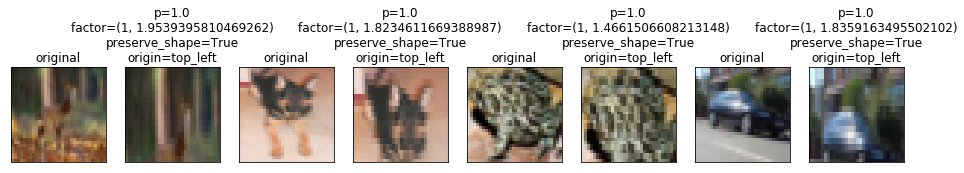

In [3]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['top_left']*4)

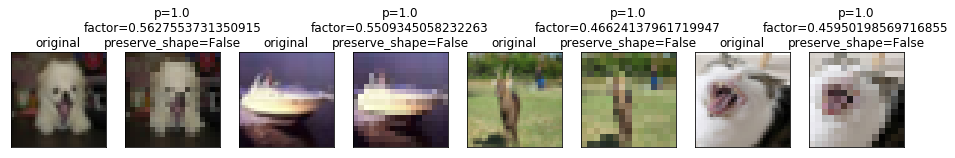

In [4]:
factor_sampler =  lambda: 0.3 + 0.4 * np.random.beta(5,5)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[False]*4)

/home/grisha/work/dataset/dataset/batch_image.py:595: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  crop_origin =  'top_left' if origin != 'center' else 'center'


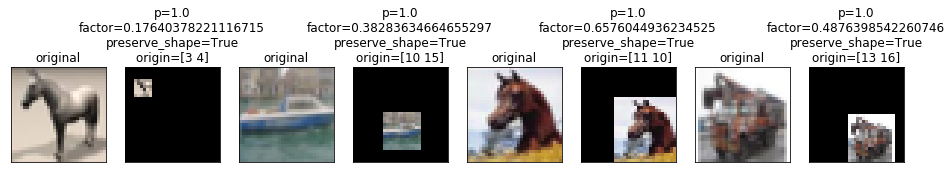

In [6]:
factor_sampler =  lambda: 0.1 + 0.7 * np.random.beta(2,2)
origin_sampler = lambda: (20 * np.random.beta(2,2,2)).astype(np.int)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=[origin_sampler() for i in range(4)])

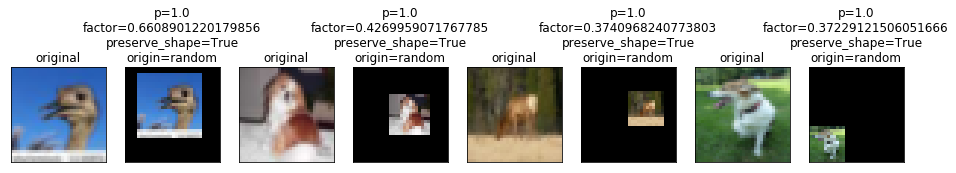

In [7]:
factor_sampler =  lambda: 0.1 + 0.7 * np.random.beta(2,2)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['random']*4)

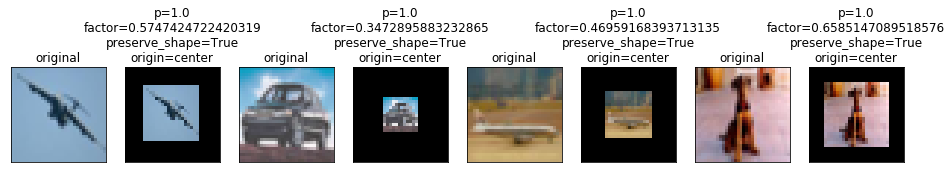

In [8]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

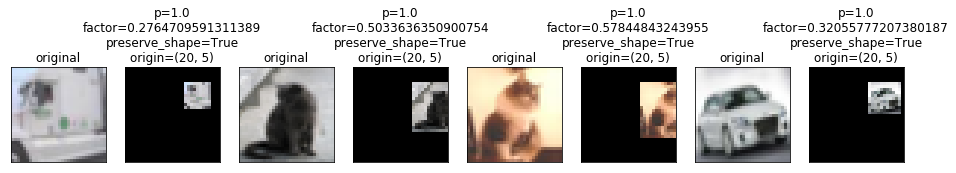

In [9]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=[(20,5)]*4)

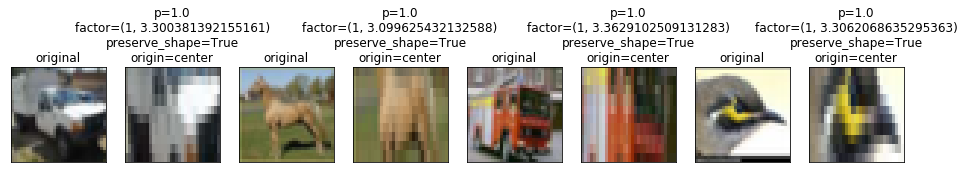

In [10]:
factor_sampler = lambda: (1, 2+2*np.random.beta(5,5))
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

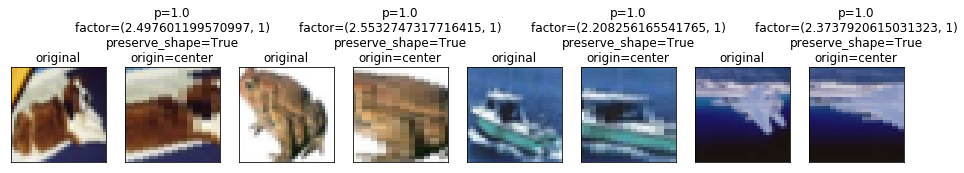

In [11]:
factor_sampler = lambda: (2+np.random.beta(5,5), 1)
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

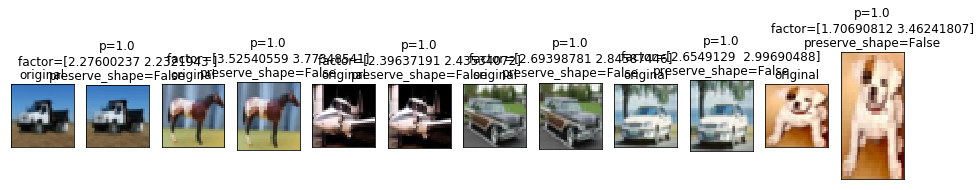

In [12]:
factor_sampler = lambda: (1+3*np.random.beta(2,2,2))
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*6,
              factor=[factor_sampler() for i in range(6)],
              preserve_shape=[False]*6)

# Pad

args ()
kwargs {'border': 10}
args ()
kwargs {'border': 10}
args ()
kwargs {'border': (10, 20)}
args ()
kwargs {'border': (10, 20)}
args ()
kwargs {'border': (20, 10)}
args ()
kwargs {'border': (20, 10)}
args ()
kwargs {'border': (10, 20, 30, 40)}
args ()
kwargs {'border': (10, 20, 30, 40)}


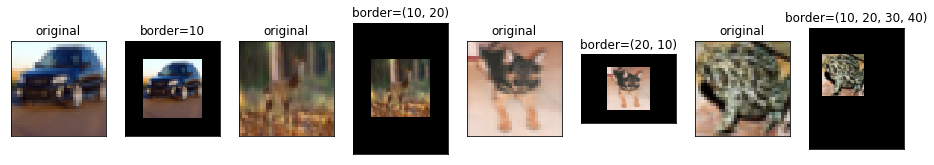

In [3]:
plot_examples(title = '',
              action = lambda batch, **params: batch.pad(**params),
              border=[10, (10, 20), (20,10), (10,20,30,40)])

# Transform

In [44]:
# https://stackoverflow.com/questions/14177744/how-does-perspective-transformation-work-in-pil
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

from_ = [(0, -5), (32, 3), (32, 29), (0, 37)]
to_ = [(0, 0), (32, 0), (32, 32), (0, 32)]
coeffs = find_coeffs(from_, to_)

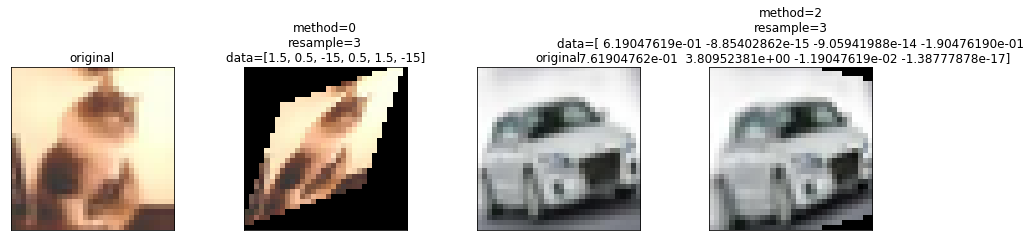

In [45]:
plot_examples(title = '',
              action = lambda batch, **params: batch.transform(**params),
              method=[PIL.Image.AFFINE, PIL.Image.PERSPECTIVE],
              resample=[3, 3],
              data=[[1.5,0.5,-15,0.5,1.5,-15], coeffs])

# Invert

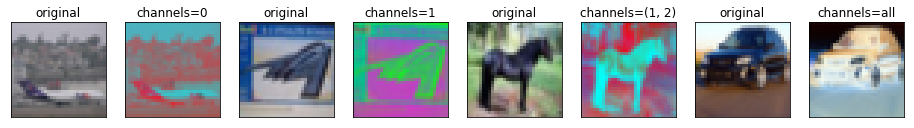

In [2]:
plot_examples(title = '',
              action = lambda batch, **params: batch.invert(**params),
              channels=[0, 1, (1, 2), 'all'])

# Threshold

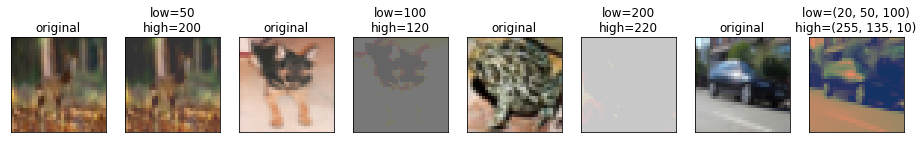

In [3]:
plot_examples(title = '',
              action = lambda batch, **params: batch.threshold(**params),
              low = [50, 100, 200] + [(20, 50, 100)],
              high = [200, 120, 220] + [(255, 135, 10)])

# Multiply

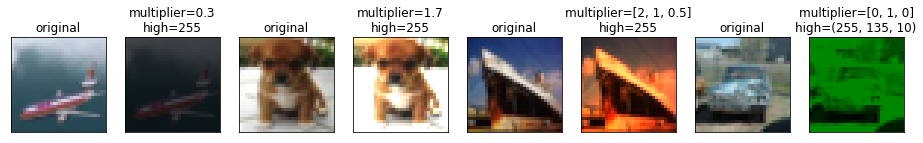

In [22]:
plot_examples(title = '',
              action = lambda batch, **params: batch.multiply(**params),
#               multiplier=[2*np.random.random() for i in range(3)] + [(2,1,0.5)],
              multiplier=[0.3, 1.7, [2, 1, 0.5], [0, 1, 0]],
              high = [255]*3 + [(255, 135, 10)])

# Multiplicative_noise

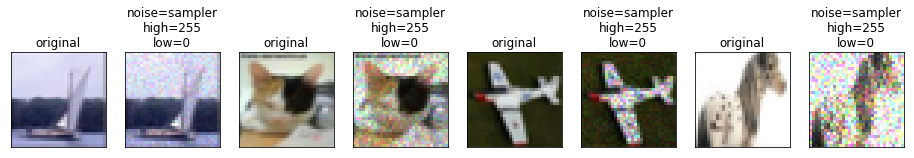

In [23]:
plot_examples(title = '',
              action = lambda batch, **params: batch.multiplicative_noise(**params),
              noise = [lambda size: np.random.uniform(0.9, 1.1, size=size),
                       lambda size: np.random.uniform(0.8, 1.2, size=size),
                       lambda size: np.random.uniform(0.7, 1.3, size=size),
                       lambda size: np.random.uniform(0.6, 1.4, size=size)],
              high = [255]*4,
              low = [0]*4)

# Add

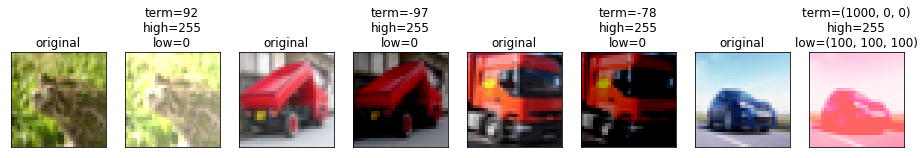

In [24]:
plot_examples(title = '',
              action = lambda batch, **params: batch.add(**params),
              term=[-100+ int(200*np.random.random()) for i in range(3)] + [(1000,0,0)],
              high = [255]*4,
              low = [0]*3 + [(100, 100, 100)])

# Additive_noise

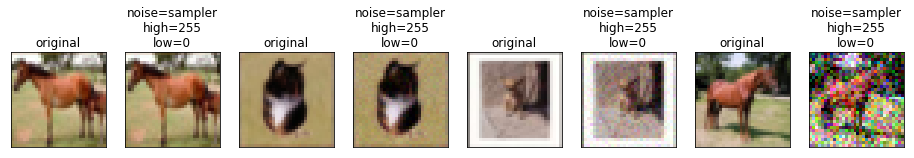

In [25]:
plot_examples(title = '',
              action = lambda batch, **params: batch.additive_noise(**params),
              noise = [lambda size: np.random.normal(0,1,size=size),
                       lambda size: np.random.normal(0,5,size=size),
                       lambda size: np.random.normal(0,10,size=size),
                       lambda size: np.random.normal(0,50,size=size)],
              high = [255]*4,
              low = [0]*4)

# Salt

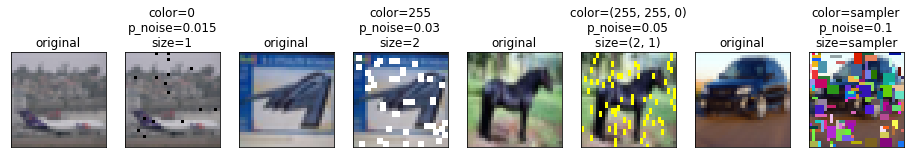

In [2]:
salt_generator=lambda: np.uint8(255*np.random.random(3))
size_generator=lambda: np.random.randint(1, 5, 2)
plot_examples(title = '',
              action = lambda batch, **params: batch.salt(**params),
              color=[0, 255, (255,255,0), salt_generator],
              p_noise=[0.015, 0.03, 0.05, 0.1],
              size=[1, 2, (2,1),size_generator])

# Filter

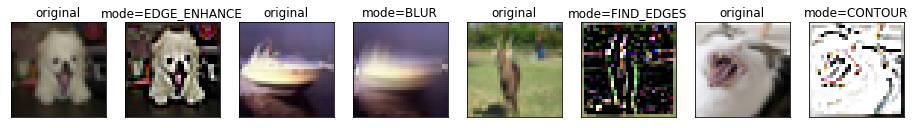

In [5]:
plot_examples(title = '',
              action = lambda batch, **params: batch.filter(**params),
              mode=['EDGE_ENHANCE','BLUR', 'FIND_EDGES', 'CONTOUR']
              )

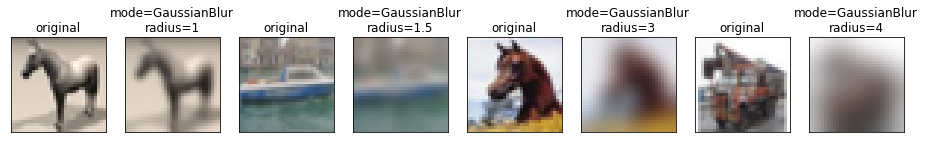

In [7]:
plot_examples(title = '',
              action = lambda batch, **params: batch.filter(**params),
              mode=['GaussianBlur']*4,
              radius=[1,1.5,3,4]
              )

# Put_on_background

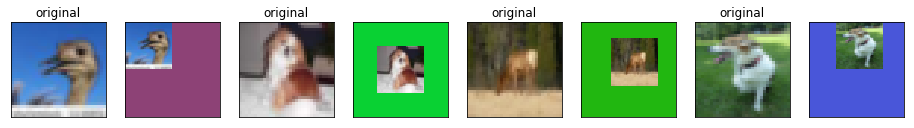

In [8]:
backgrounds = [(255*np.ones((64,64,3)) * np.random.random(3)).astype(np.uint8) for i in range(4)]
plot_examples(title = '',
              action = lambda batch, **params: batch.put_on_background(**params),
              background=backgrounds,
              origin=['top_left', 'center', 'random', 'random'],
              title_action=False)

# PIL_convert

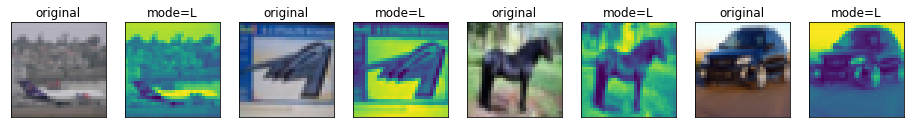

In [2]:
plot_examples(title = '',
              action = lambda batch, **params: batch.pil_convert(**params),
              mode=["L"]*4)

# Posterize

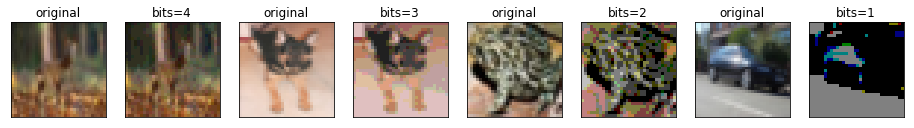

In [3]:
plot_examples(title = '',
              action = lambda batch, **params: batch.posterize(**params),
              bits=[4, 3, 2, 1])

# Cutout

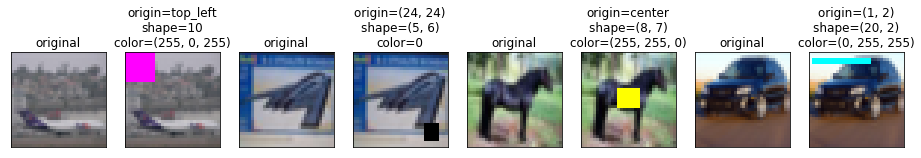

In [2]:
plot_examples(title = '',
              action = lambda batch, **params: batch.cutout(**params),
              origin = ['top_left', (24,24), 'center', (1,2)],
              shape = [10, (5,6), (8,7), (20,2)],
              color = [(255, 0, 255), 0, (255,255,0), (0,255,255)])

# Elastic_transform

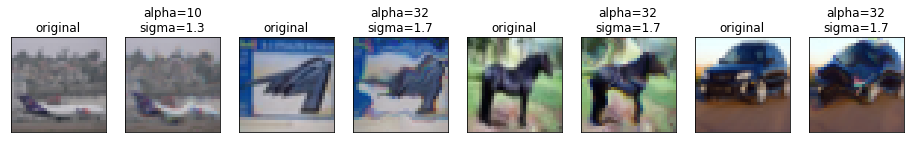

In [2]:
plot_examples(title = '',
              action = lambda batch, **params: batch.elastic_transform(**params),
              alpha = [10, 32, 32, 32],
              sigma = [1.3, 1.7, 1.7, 1.7])

# crop_to_patches

Here you will see the difference between different values of ``droplast``.

Extracting...
Extracted


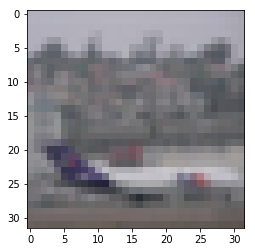

In [2]:
# First, lets add ``patches`` component where patches will be stored
class MyImagesBatch(ImagesBatch):
    components = "images", "labels", "patches"
    
cifar_patches_ds = CIFAR10(batch_class=MyImagesBatch, path=PATH_TO_CIFAR)
b = cifar_patches_ds.train.next_batch(2)
plt.imshow(b.images[0])

> ``droplast=False``

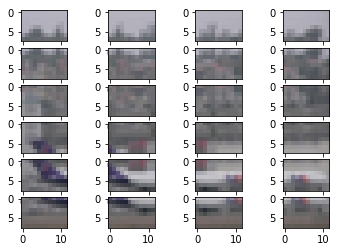

In [3]:
# note that you must specify ``src`` to write patches to
b.split_to_patches(patch_shape=(8,12),
                   stride=(5,7),
                   droplast=False,
                   src='images', dst='patches')
f, a = plt.subplots(6, 4)
for i, ai in enumerate(a.flatten()):
    ai.imshow(b.patches[i])

> ``droplast=True``

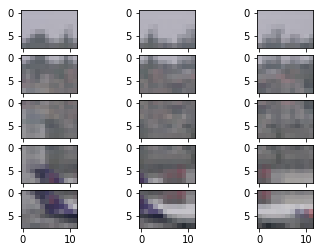

In [4]:
# note that you must specify ``src`` to write patches to
b.split_to_patches(patch_shape=(8,12),
                   stride=(5,7),
                   droplast=True,
                   src='images', dst='patches')
f, a = plt.subplots(5, 3)
for i, ai in enumerate(a.flatten()):
    ai.imshow(b.patches[i])

# Pipeline example

In [2]:
def draw_batch_images(batch):
    f, a = plt.subplots(3, 6, figsize=(16, 8))
    for image, ai in zip(batch.images, a.flatten()):
        ai.imshow(image)

> Initialization and train pipelines

In [4]:
batch_size = 18
init_pipeline = (Pipeline()
         .to_PIL()
         .init_variable('model_arch', VGG7)
         .init_model('dynamic', V('model_arch'), 'model',
                     config = {'inputs' : {'images': {'shape': B('image_shape'),
                                                      'data_format': 'channels_last'},
                                           'labels': {'classes': 10,
                                                      'transform': 'ohe',
                                                      'name': 'targets'}},
                               'loss' : {'name' : 'crossentropy'},
                               'optimizer': {'name' : 'GradientDescent',
                                             'learning_rate' : 0.001},
                               'input_block/inputs' : 'images'}))

init_pipeline = init_pipeline << cifar_ds.train


train_pipeline = Pipeline().to_array().train_model('model',
                      feed_dict={'images': B('images'),
                                 'labels': B('labels')})

* By default, every element in a batch is transformed with parameters which are common for all elements in the batch (for example, angle=R('normal') first samples an angle then it rotates all images in the batch by equal angle). For example:

In [5]:
# here ``angle`` is sampled
augmentation_pipeline = Pipeline()\
                        .rotate(angle=R('normal', loc=0, scale=25))

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



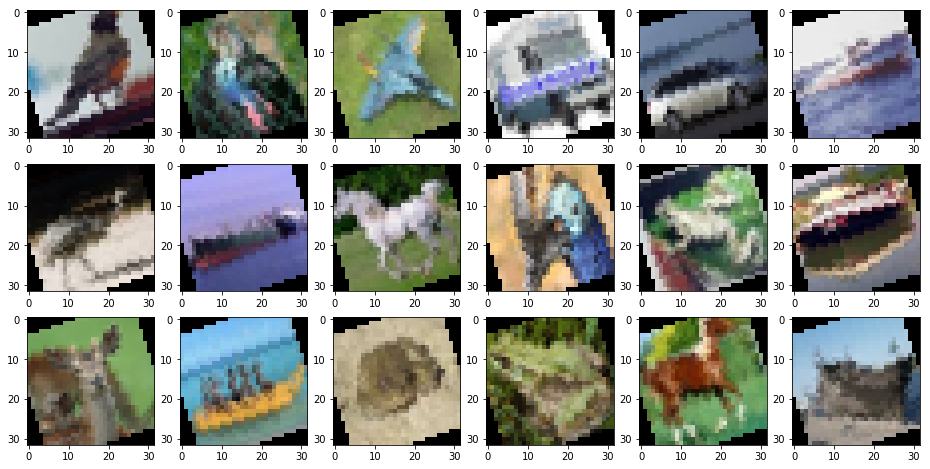

In [6]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

# all images in ``batch`` are rotated by the equal angle
draw_batch_images(batch)

* To sample a parameter for every element, use ``P(R(...))`` named expression

In [7]:
# here angle is sampled for every element in a batch
# don't forget to crop images to the same size after rotation
augmentation_pipeline = Pipeline()\
                        .rotate(angle=P(R('normal', loc=0, scale=25)))

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

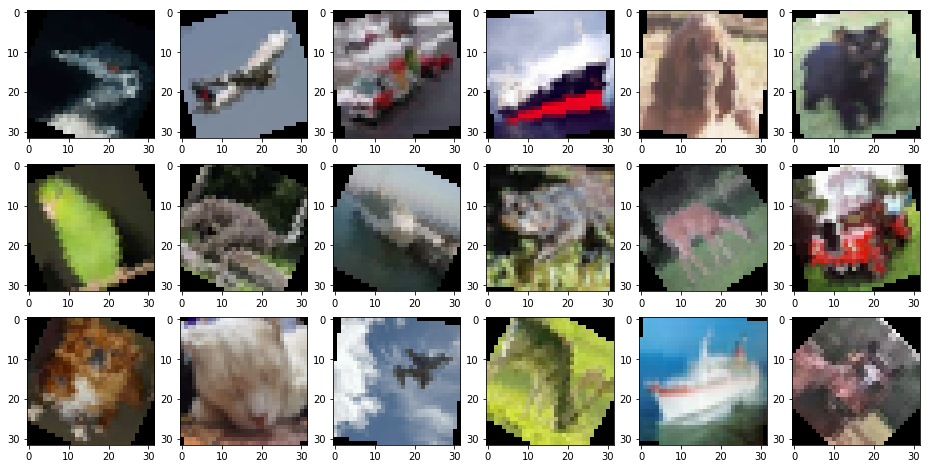

In [8]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

# now angle is random for every element in ``batch``
draw_batch_images(batch)

* You can stack several actions

In [12]:
# if you use custom generator then it must have ``size`` parameter
# which determines the number of values to sample
salt_generator = lambda size=1: 255*np.random.random(size=(size,3))

augmentation_pipeline = Pipeline()\
                        .salt(color=P(R(salt_generator)),
                                          p_noise=P(R('uniform', 0.01, 0.3)), p=0.5)\
                        .rotate(angle=P(R('normal', loc=0, scale=25)), p=0.5)

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

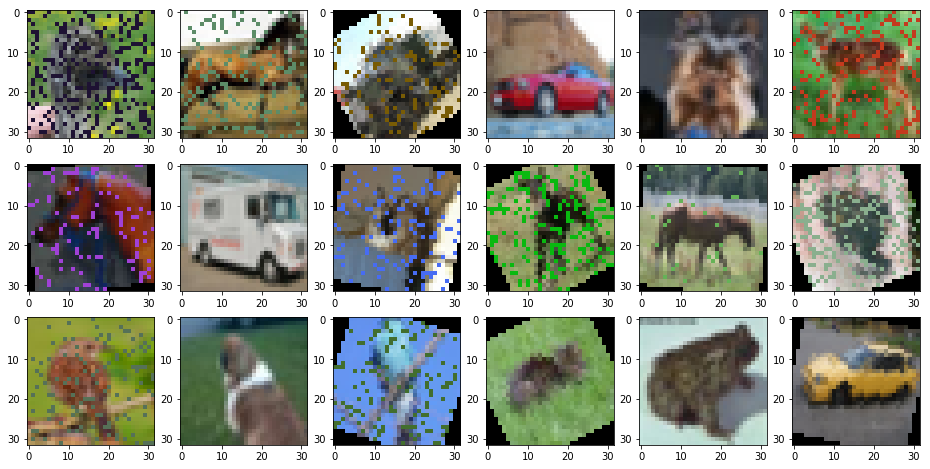

In [13]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

draw_batch_images(batch)